# Final Project Report

* Class: DS 5100
* Student Name: Cameron Her
* Student Net ID: csh4bj
* This URL: https://github.com/csh4bj/FinalProject/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/csh4bj/FinalProject

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd

class Die:
    """
    A die has 𝑁 sides, or “faces”, and  𝑊 weights, and can be rolled to select a face.
    
    Each side contains a unique symbol. Symbols may be all alphabetic or all numeric.
    
    𝑊 defaults to  1.0 for each face but can be changed after the object is created.
    The weights are just positive numbers (integers or floats, including  0), not a normalized probability distribution.
    
    This Die class has 4 methods: 
    • An initializer.
    • A method to change the weight of a single side. 
    • A method to roll the die one or more times.
    • A method to show the die’s current state.
    
    """
    def __init__(self, faces):
        """
        PURPOSE: This method initializes the Die object and saves both faces and weights in a private data frame with faces in the index.  
        
        INPUT: This method takes a NumPy array of faces as an argument. The array’s data type dtype may be strings or numbers, but the array’s values must be distinct.
        
        OUTPUT: None.

        """
        if type(faces) !=  np.ndarray:
            raise TypeError("Faces is not a NumPy array.")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Faces values must be distinct.")
        
        self.my_die = pd.DataFrame({'face': faces,'weight': [1.0] * len(faces)}).set_index('face')

        
    def change_weight(self, face, new_weight):
        """
        PURPOSE: This method changes the weight of a single side. 
        
        INPUT: Takes two arguments: the face value to be changed and the new weight.
        
        OUTPUT: None.

        """
        if face not in self.my_die.index:
            raise IndexError("Face is not on this Die.")
        try:
            new_weight = float(new_weight)
            if new_weight < 0:
                raise ValueError("Weight cannot be a negative value.")
        except ValueError:
                raise TypeError("Weight is not a valid type.")
        self.my_die.loc[face, 'weight'] = new_weight
    
    def roll_dice(self, n_rolls=1):
        """
        PURPOSE: This method rolls the die/dice using random sample with replacement, from the private die data frame, that applies the weights.
        
        INPUT: A parameter of how many times the die is to be rolled; defaults to  1.
        
        OUTPUT: pd.Series(results), a series with the results of the dice roll.

        """
        results = []
        for i in range(n_rolls):
            result = self.my_die.sample(weights=self.my_die['weight']).index.values[0]
            results.append(result)
        return pd.Series(results)
    
    def show(self):
        """
        PURPOSE: This method shows the die’s current state.
        
        INPUT: None.

        OUTPUT: Returns a copy of the private die data frame.
        
        """
        return self.my_die.copy()

    
    
class Game:
    """
    A game consists of rolling of one or more similar dice one or more times.
    
    Similar dice are Die objects that have the same number of sides and associated faces,
    though each die object may have its own weights. Game objects keep only the results
    of their most recent play.
    
    This Game class has 3 methods: 
    • An initializer.
    • A play method to simulate rolling a number of similar dice a specific number of times.
    • A method that shows the user the results of the most recent play.  
    """
    
    def __init__(self, dice_list):
        
        """
        PURPOSE: This method initializes the Game object with a list of dice objects. 
        
        INPUT: This method a single parameter, a list of already instantiated similar dice.
        
        OUTPUT: None.

        """
        self.dice_list = dice_list
        self.results = None
        
        
    def play(self, n_rolls):
        """
        PURPOSE: This method simulate rolling a number of similar dice a specific number of times.
        
        INPUT: This method takes an integer parameter to specify how many times the dice should be rolled.
        
        OUTPUT: This method saves the result of the play to a private data frame.

        """

        result_data = {}
        for i, dice in enumerate(self.dice_list):
            result_data[i] = dice.roll_dice(n_rolls).values
        self.results = pd.DataFrame(result_data)
        self.results.index.name = 'roll_number'
        
        
    def show(self, form='wide'):

        """
        PURPOSE: This method shows the user the results of the most recent play.  
        
        INPUT: This method takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
        
        OUTPUT: This method outputs pandas.DataFrame of the results from the game.
        • The wide format will have the roll number as a named index, columns for each die number and the face rolled in that instance in each cell.
        • The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), and a single column with the outcomes.

        """
        
        if self.results is None:
            return None

        if form == 'wide':
            return self.results.copy()

        elif form == 'narrow':
            narrow_results = self.results.stack()
            narrow_results.index.names = ['roll_number', 'die_number']
            return narrow_results.to_frame('outcome')

        
        else:
            raise ValueError("Form must be either 'wide' or 'narrow'")
            

class Analyzer:
    """
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
    
    This Analyzer class has 5 methods: 
    • An initializer.
    • A method that computes how many times the game resulted in a jackpot.
    • A method that computes how many times a given face is rolled in each event.
    • A method that computes the distinct combinations of faces rolled, along with their counts.
    • A method that computes the distinct permutations of faces rolled, along with their counts.
    
    """
    def __init__(self, game):
        """
        PURPOSE: This method initializes the Analyzer object.
        
        INPUT: This method takes a game object as its input parameter.
        
        OUTPUT: None.

        """
        if type(game) is not Game:
            raise ValueError("Value is not a Game object")
            
        self.game = game
        self.results = game.show(form='wide')
        self.jackpot_count = 0
        self.face_counts = None
        self.combo_counts = None
        self.permutation_counts = None

    def jackpot(self):
        
        """
        PURPOSE: This method computes how many times the game resulted in a jackpot. 
        
        INPUT: None
        
        OUTPUT: This method returns an integer for the number of jackpots.

        """
        
        count = 0
        for i in self.results.index:
            row = self.results.loc[i]
            if len(row.unique()) == 1:
                count += 1
        self.jackpot_count = count
        
        return self.jackpot_count

    def face_counts_per_roll(self):
        
        """
        PURPOSE: This method computes how many times a given face is rolled in each event.
        
        INPUT: None
        
        OUTPUT: This method returns a data frame of results.

        """
        
        counts_list = []
        
        for i in self.results.index:
            row = self.results.loc[i].values
            face_count = {}
            
            for face in row:
                face_count[face] = face_count.get(face, 0) + 1
                
            counts_list.append(face_count)
        
        counts_df = pd.DataFrame(counts_list).fillna(0).astype(int)
        counts_df.index = self.results.index
        
        self.face_counts = counts_df
        return self.face_counts

    def combo_count(self):
            
        """
        PURPOSE: This method computes the distinct combinations of faces rolled, along with their counts.
        
        INPUT: None
        
        OUTPUT: This method returns a data frame of results which has a MultiIndex of distinct combinations and a column for the associated counts.

        """
        
        combo_list = []
        
        for i in self.results.index:
            row = self.results.loc[i].values
            
            sorted_combo = tuple(sorted(row)) 
            
            combo_list.append(sorted_combo)
        
        combo_series = pd.Series(combo_list)
        combo_counts = combo_series.value_counts().to_frame(name='count')
        combo_counts.index.name = 'combo'
        
        self.combo_counts = combo_counts
        return self.combo_counts

    def permutation_count(self):
        
        """
        PURPOSE: This method computes the distinct permutations of faces rolled, along with their counts.
        
        INPUT: None
        
        OUTPUT: This method returns a data frame of results which has a MultiIndex of distinct permutations and a column for the associated counts.

        """
        perm_list = []

        for i in self.results.index:
            row = self.results.loc[i].values
            permutation = tuple(row) 
            perm_list.append(permutation)

        perm_series = pd.Series(perm_list)
        perm_counts = perm_series.value_counts().to_frame(name='count')
        perm_counts.index.name = 'permutation'

        self.permutation_counts = perm_counts
        return self.permutation_counts
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd
from MonteCarlo import Die, Game, Analyzer

class DieGameAnalyzerTestSuite(unittest.TestCase):
    
     # Die method tests
    def test_die_init(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        self.assertListEqual(list(die.my_die.index), list(faces))
        self.assertTrue((die.my_die['weight'] == 1.0).all())

    def test_die_change_weight(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        die.change_weight('H', 5.0)
        result = die.show()
        
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.loc['H', 'weight'], 5.0)

    def test_die_roll_dice(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        results = die.roll_dice(3)
        
        self.assertIsInstance(results, pd.Series)
        self.assertEqual(len(results), 3)

    def test_die_show(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        df = die.show()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertIn('weight', df.columns)

    # Game method tests
    
    def test_game_init(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        
        self.assertEqual(len(game.dice_list), 2)

    def test_game_play(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        
        self.assertIsInstance(game.results, pd.DataFrame)
        self.assertEqual(game.results.shape[0], 5)
        
    def test_game_show_wide(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        
        df = game.show(form='wide')
        self.assertEqual(df.shape, (5, 2))
        self.assertIsInstance(df, pd.DataFrame)

    def test_game_show_narrow(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        df = game.show(form='narrow')
        
        self.assertEqual(df.shape, (10, 1))
        self.assertIsInstance(df, pd.DataFrame)
        
        
        # Analyzer method tests
        
    def test_analyzer_init(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        analyzer = Analyzer(game)
        
        self.assertEqual(analyzer.jackpot_count, 0)
        self.assertIsNone(analyzer.face_counts)
        self.assertIsNone(analyzer.combo_counts)
        self.assertIsNone(analyzer.permutation_counts)

    def test_analyzer_jackpot(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        analyzer = Analyzer(game)
        count = analyzer.jackpot()
        
        self.assertIsInstance(count, int)
        self.assertLessEqual(count, len(game.results))

    def test_analyzer_face_counts_per_roll(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        analyzer = Analyzer(game)
        df = analyzer.face_counts_per_roll()
        
        self.assertIsInstance(df, pd.DataFrame)
        self.assertEqual(df.shape[0], 5)
        self.assertTrue(df.index.equals(game.results.index))
        
    def test_analyzer_combo_count(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        analyzer = Analyzer(game)
        df = analyzer.combo_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertLessEqual(len(df), 5)
        self.assertIn('count', df.columns)


    def test_analyzer_permutation_count(self):
        faces = np.array(['H', 'T'])
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        analyzer = Analyzer(game)
        df = analyzer.permutation_count()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertLessEqual(len(df), 5)
        self.assertIn('count', df.columns)

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

``` bash
bash-4.4$ python test_montecarlo.py
test_analyzer_combo_count (__main__.DieGameAnalyzerTestSuite.test_analyzer_combo_count) ... ok
test_analyzer_face_counts_per_roll (__main__.DieGameAnalyzerTestSuite.test_analyzer_face_counts_per_roll) ... ok
test_analyzer_init (__main__.DieGameAnalyzerTestSuite.test_analyzer_init) ... ok
test_analyzer_jackpot (__main__.DieGameAnalyzerTestSuite.test_analyzer_jackpot) ... ok
test_analyzer_permutation_count (__main__.DieGameAnalyzerTestSuite.test_analyzer_permutation_count) ... ok
test_die_change_weight (__main__.DieGameAnalyzerTestSuite.test_die_change_weight) ... ok
test_die_init (__main__.DieGameAnalyzerTestSuite.test_die_init) ... ok
test_die_roll_dice (__main__.DieGameAnalyzerTestSuite.test_die_roll_dice) ... ok
test_die_show (__main__.DieGameAnalyzerTestSuite.test_die_show) ... ok
test_game_init (__main__.DieGameAnalyzerTestSuite.test_game_init) ... ok
test_game_play (__main__.DieGameAnalyzerTestSuite.test_game_play) ... ok
test_game_show_narrow (__main__.DieGameAnalyzerTestSuite.test_game_show_narrow) ... ok
test_game_show_wide (__main__.DieGameAnalyzerTestSuite.test_game_show_wide) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.043s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
import numpy as np
import pandas as pd
from montecarlo import MonteCarlo
from montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [17]:
help(MonteCarlo)

Help on module montecarlo.MonteCarlo in montecarlo:

NAME
    montecarlo.MonteCarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  This Analyzer class has 5 methods: 
     |  • An initializer.
     |  • A method that computes how many times the game resulted in a jackpot.
     |  • A method that computes how many times a given face is rolled in each event.
     |  • A method that computes the distinct combinations of faces rolled, along with their counts.
     |  • A method that computes the distinct permutations of faces rolled, along with their counts.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPOSE: This method initializes the Analyzer object.
     |      
     |      INPUT: This method takes a ga

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/csh4bj/FinalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
bash-4.4$ pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/csh4bj/Documents/MSDS/DS5100/FinalProject
  Preparing metadata (setup.py) ... done
Requirement already satisfied: pandas in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from montecarlo==0.1) (2.0.3)
Requirement already satisfied: numpy in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from montecarlo==0.1) (1.24.4)
Requirement already satisfied: python-dateutil>=2.8.2 in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from pandas->montecarlo==0.1) (2.8.2)
Requirement already satisfied: pytz>=2020.1 in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from pandas->montecarlo==0.1) (2023.3)
Requirement already satisfied: tzdata>=2022.1 in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from pandas->montecarlo==0.1) (2023.3)
Requirement already satisfied: six>=1.5 in /apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages (from python-dateutil>=2.8.2->pandas->montecarlo==0.1) (1.16.0)
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.1-py3-none-any.whl size=3989 sha256=534da4cdaf10048263c0c67d2fa48c4c80532762769f687cf6cf325254b4d79f
  Stored in directory: /tmp/pip-ephem-wheel-cache-t8flh3vu/wheels/25/82/e5/cef9c8d7fbd829cb2a22f1babc4f15472c129dd590bd6d49f9
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
faces = np.array(['H', 'T'])
fair_coin = Die(faces)

unfair_coin = Die(faces)
unfair_coin.change_weight('T', 5)

print(fair_coin.show())
print(unfair_coin.show())

      weight
face        
H        1.0
T        1.0
      weight
face        
H        1.0
T        5.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
task2_game = Game([fair_coin, fair_coin])

task2_game.play(1000)

print(task2_game.show(form='wide'))

             0  1
roll_number      
0            T  T
1            T  T
2            T  T
3            T  H
4            H  T
...         .. ..
995          H  H
996          T  H
997          H  T
998          T  H
999          T  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
task3_game = Game([unfair_coin, unfair_coin, fair_coin])

task3_game.play(1000)

print(task3_game.show(form='wide'))

             0  1  2
roll_number         
0            T  T  T
1            H  T  T
2            T  T  H
3            T  T  H
4            T  T  T
...         .. .. ..
995          H  T  H
996          T  H  H
997          T  T  T
998          H  T  H
999          H  H  H

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
task2_analyzer = Analyzer(task2_game)
task2_jackpot = task2_analyzer.jackpot()
print(f"Frequency of Jackpots for Game in Task2 with Fair Dice:   {task2_jackpot}")

task3_analyzer = Analyzer(task3_game)
task3_jackpot = task3_analyzer.jackpot()
print(f"Frequency of Jackpots for Game in Task3 with Weighted Dice:  {task3_jackpot}")

Frequency of Jackpots for Game in Task2 with Fair Dice:   518
Frequency of Jackpots for Game in Task3 with Weighted Dice:  355


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [7]:
rel_freq_task2 = task2_jackpot / 1000
print(f"Relative frequency of Jackpots for Game in Task2 with Fair Dice:   {rel_freq_task2}")


rel_freq_task3 = task3_jackpot / 1000
print(f"Relative frequency of Jackpots for Game in Task3 with Weighted Dice:  {rel_freq_task3}")

Relative frequency of Jackpots for Game in Task2 with Fair Dice:   0.518
Relative frequency of Jackpots for Game in Task3 with Weighted Dice:  0.355


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: >

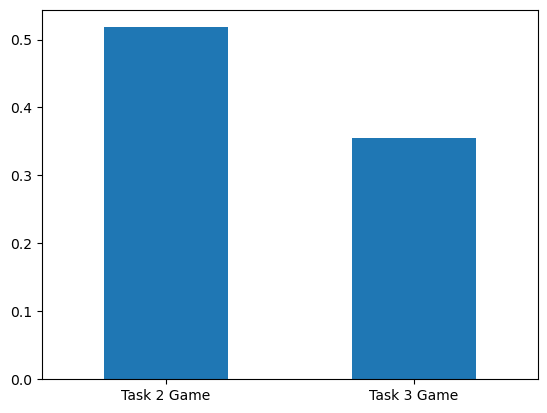

In [8]:
import pandas as pd

relative_frequencies = pd.Series({
    'Task 2 Game': rel_freq_task2,
    'Task 3 Game': rel_freq_task3
})

relative_frequencies.sort_index().plot.bar(rot=0)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [9]:
faces2 = np.array([1, 2, 3, 4, 5, 6])
die1 = Die(faces2)
die2 = Die(faces2)
die3 = Die(faces2)

print(die1.show())
print(die2.show())
print(die3.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [10]:
die2.change_weight(6, 5)
print(die2.show())

      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [11]:
die3.change_weight(1, 5)
print(die3.show())

      weight
face        
1        5.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [12]:
fair_game = Game([die1, die1, die1, die1, die1])

fair_game.play(10000)
print(fair_game.show(form='wide').head())

             0  1  2  3  4
roll_number               
0            3  3  1  4  1
1            5  6  1  2  2
2            6  6  3  1  6
3            6  2  6  6  4
4            6  3  6  3  3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
unfair_game = Game([die1, die1, die1, die2, die3])
unfair_game.play(10000)
print(unfair_game.show(form='wide').head())

             0  1  2  3  4
roll_number               
0            3  4  2  6  3
1            6  2  1  4  2
2            5  1  4  4  1
3            5  1  6  3  1
4            5  2  2  6  4


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

<Axes: >

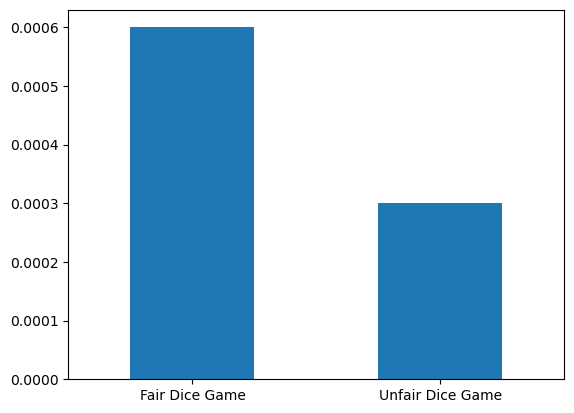

In [14]:
analyzer_fair = Analyzer(fair_game)
jackpots_fair = analyzer_fair.jackpot()

analyzer_unfair = Analyzer(unfair_game)
jackpots_unfair = analyzer_unfair.jackpot()

rel_freq_fair = jackpots_fair / 10000
rel_freq_unfair = jackpots_unfair / 10000

relative_frequencies2 = pd.Series({
    'Fair Dice Game': rel_freq_fair,
    'Unfair Dice Game': rel_freq_unfair
})

relative_frequencies2.sort_index().plot.bar( rot=0)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [25]:
letter_data = pd.read_csv('english_letters.txt', sep='\s+', header=None)
letters = letter_data.iloc[:, 0].values
frequencies = letter_data.iloc[:, 1].values

alphabet_die = Die(letters)

for i in range(len(letters)):
    alphabet_die.change_weight(letters[i], frequencies[i])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [26]:
alphabet_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die])

alphabet_game.play(1000)
print(alphabet_game.show(form='wide').head())

             0  1  2  3
roll_number            
0            T  T  O  I
1            D  C  N  W
2            D  E  Y  O
3            O  A  E  A
4            Y  A  W  S


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [27]:
scrabble_analyzer = Analyzer(alphabet_game)

alphabet_permutations = scrabble_analyzer.permutation_count()
scrabble_words = pd.read_csv('scrabble_words.txt', header = None)
scrabble_words = scrabble_words[0]
permutation_words = [''.join(i) for i in alphabet_permutations.index]
English_words = [word for word in permutation_words if word in scrabble_words.values]

print(English_words)

total_permutations = len(alphabet_permutations)
total_words_found = len(English_words)
difference = total_permutations - total_words_found

print(f"Total Permutations: {total_permutations}")
print(f"Valid English words found: {total_words_found}")
print(f"Difference: {difference}")

['THEW', 'THEN', 'STEW', 'ONER', 'AWEE', 'SPAY', 'LEER', 'POTT', 'PEAT', 'SAIN', 'HYLA', 'AIAS', 'BRIE', 'ETNA', 'ROTS', 'SORN', 'NAGS', 'PSST', 'TINK', 'TEEN', 'APES', 'FIRE', 'TOTS', 'MOME', 'GORE', 'ENES', 'SEES', 'BEES', 'HAAR', 'GUDE', 'EHED', 'ROLL', 'ERNE', 'GROT', 'WEEP', 'RORE', 'OOTS', 'ESNE', 'YAWS', 'AILS', 'ONOS', 'KORS', 'ECHT', 'TYEE', 'NISH', 'STAT', 'ETUI', 'HISS', 'ARIL', 'ONIE', 'POME', 'AIRN', 'EEVN', 'TETE', 'PEST', 'LEAR', 'SIPS', 'LOTE', 'OAFS']
Total Permutations: 987
Valid English words found: 59
Difference: 928


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [28]:
alphabet_game2 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])

alphabet_game2.play(1000)
print(alphabet_game2.show(form='wide').head())

scrabble_analyzer2 = Analyzer(alphabet_game2)

alphabet_permutations2 = scrabble_analyzer2.permutation_count()
permutation_words2 = [''.join(i) for i in alphabet_permutations2.index]
English_words2 = [word for word in permutation_words2 if word in scrabble_words.values]

print(English_words2)

total_words_found2 = len(English_words2)
print(f"Valid English words found: {total_words_found2}")

             0  1  2  3  4
roll_number               
0            H  R  U  E  E
1            S  E  P  E  R
2            T  E  W  N  E
3            E  R  F  O  W
4            T  F  A  Y  A
['ENTER', 'ETUDE', 'REENS', 'PRIME', 'EILDS', 'NONCE', 'NAKED', 'RAMEN', 'TRIOL']
Valid English words found: 9
